Read dataset 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import joblib

In [5]:
red_df = pd.read_csv('../data/winequality-red.csv', sep=';')
white_df = pd.read_csv('../data/winequality-white.csv', sep=';')


In [7]:
red_df['type'] = 'red'
white_df['type'] = 'white'

In [9]:
df = pd.concat([red_df, white_df], ignore_index=True)

In [11]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,red
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,red
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,red
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red


Exploratory Data Analysis (EDA)

In [13]:
# Check for missing values
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
type                    0
dtype: int64

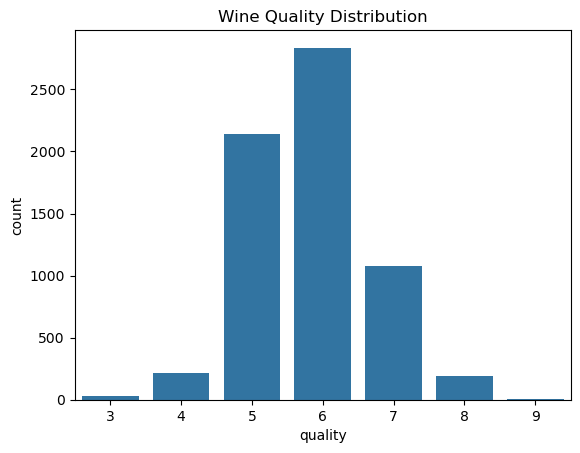

In [15]:
# Visualize quality distribution
sns.countplot(x='quality', data=df)
plt.title("Wine Quality Distribution")
plt.show()

Data Preprocessing 

In [17]:
#Convert 'type' to numeric
df['type'] = df['type'].map({'red': 0, 'white': 1})

In [21]:
# Features and target
X = df.drop('quality', axis=1)
y = df['quality']

In [23]:
#Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [25]:
#Confirm shape
X_train.shape, X_test.shape

((5197, 12), (1300, 12))

Model Training (Random Forest)

In [27]:
# Train Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [29]:
# Predictions
y_pred = rf_model.predict(X_test)

Model Evaluation

Accuracy: 0.6646153846153846

Classification Report:
               precision    recall  f1-score   support

           3       0.00      0.00      0.00         6
           4       0.62      0.12      0.20        43
           5       0.65      0.72      0.69       402
           6       0.66      0.75      0.70       597
           7       0.71      0.52      0.60       215
           8       0.92      0.33      0.49        36
           9       0.00      0.00      0.00         1

    accuracy                           0.66      1300
   macro avg       0.51      0.35      0.38      1300
weighted avg       0.67      0.66      0.65      1300



C:\Users\Lathiya Prushti\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Lathiya Prushti\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Lathiya Prushti\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


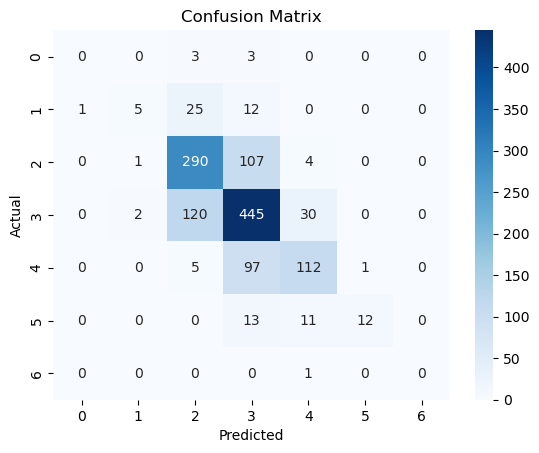

In [31]:
# Accuracy
print("Accuracy:", accuracy_score(y_test, y_pred))

# Classification Report
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Confusion Matrix
conf_mat = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

Save the Trained Model

In [33]:
# Save model
joblib.dump(rf_model, '../models/random_forest_wine_model.pkl')
print("Model saved to '../models/random_forest_wine_model.pkl'")


Model saved to '../models/random_forest_wine_model.pkl'
